In [157]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.tsa.seasonal
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv(r"C:\Users\sreev\Downloads\GlobalLandTemperaturesByState.csv.zip")

In [159]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [160]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [161]:
df.shape

(645675, 5)

In [162]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [163]:
df.head(50)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
5,1855-10-01,25.442,1.179,Acre,Brazil
6,1855-11-01,25.400,1.064,Acre,Brazil
7,1855-12-01,24.100,1.718,Acre,Brazil
8,1856-01-01,25.814,1.159,Acre,Brazil
9,1856-02-01,24.658,1.147,Acre,Brazil


In [164]:
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=645675, freq=None)

In [165]:
print(df.columns)

Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')


In [166]:
df = df.sort_index()  
latest_df = df.loc['1980':'2012']

In [167]:
latest_df[['Country', 'AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')

,AverageTemperature
Country,
Canada,-0.733369
Russia,2.395705
United States,11.481044
China,12.116300
Australia,18.444355
India,22.854513
Brazil,24.538274


In [168]:
dates = pd.date_range('1980-01-01', '2012-12-31', freq='D')
data = pd.DataFrame({'value': range(len(dates))}, index=dates)
data = data.sort_index()
latest_df = data.loc['1980':'2012']
print(latest_df.head())


            value
1980-01-01      0
1980-01-02      1
1980-01-03      2
1980-01-04      3
1980-01-05      4


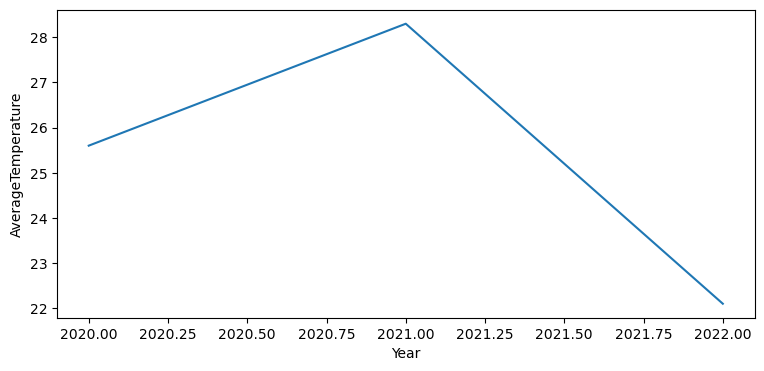

In [169]:
data = {
    'Year': [2020, 2021, 2022],
    'AverageTemperature': [25.6, 28.3, 22.1]
}
latest_df = pd.DataFrame(data)
plt.figure(figsize=(9, 4))
sns.lineplot(x='Year', y='AverageTemperature', data=latest_df)
plt.show()



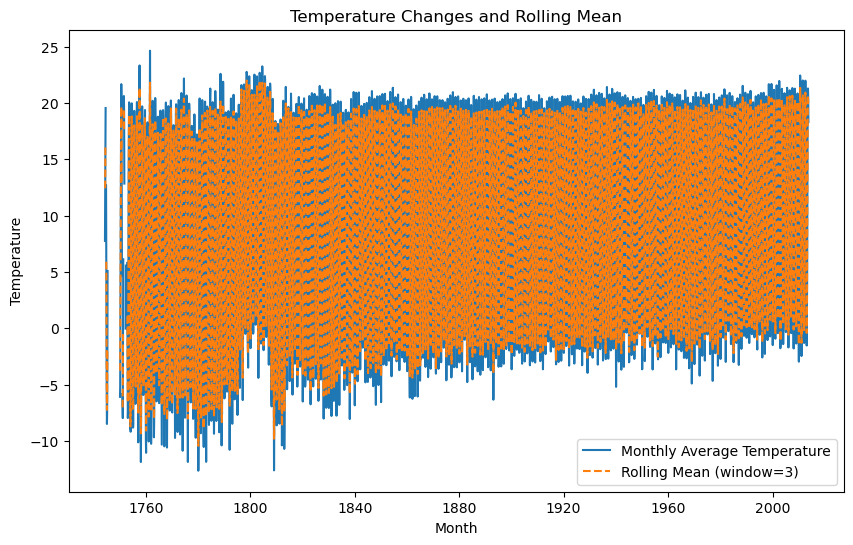

In [170]:

resample_df = df.resample('M')['AverageTemperature'].mean()
rol_mean = resample_df.rolling(window=3, center=True).mean()

ewm = resample_df.ewm(span=3).mean()

rol_std = resample_df.rolling(window=3, center=True).std()

plt.figure(figsize=(10, 6))
plt.plot(resample_df.index, resample_df.values, label='Monthly Average Temperature')
plt.plot(rol_mean.index, rol_mean.values, label='Rolling Mean (window=3)', linestyle='--')
plt.legend()
plt.title('Temperature Changes and Rolling Mean')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()


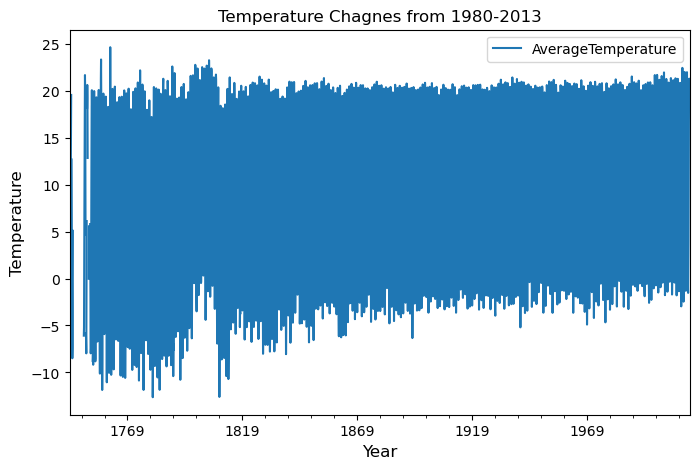

In [171]:
resample_df.plot(title='Temperature Chagnes from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

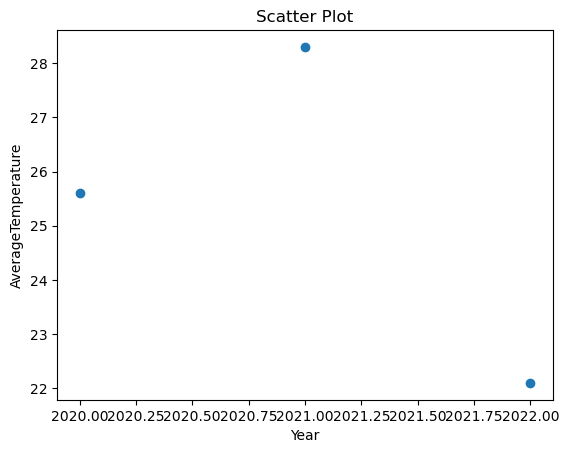

In [172]:
plt.scatter(data['Year'], data['AverageTemperature'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Year')
plt.ylabel('AverageTemperature')
 
plt.show()